# Face Detection using OpenCV3

In [168]:
# For displaying images inline in jupyter
% matplotlib inline
import cv2  # Why would they name the OpenCV3 library cv2?
print('OpenCV version:', cv2.__version__)
import matplotlib.pyplot as plt

OpenCV version: 3.2.0


In [169]:
def show_image(img, title, cmap=None):
    """
    Utility function to display an image with a title and a given color mapping inline with Jupyter Notebook. 
    """
    plt.figure(figsize=(12,12))
    plt.imshow(img, interpolation='bicubic', cmap=cmap)
    plt.title(title, fontsize=24)
    plt.axis('off')
    plt.style.use('seaborn-dark')
    plt.show()

In [170]:
def reverse_channels(image):
    """
    OpenCV3 opens color images in BGR format. A computer display requires images to be RGB.
    This utility function takes an image in either BGR or RGB format and returns that same
    image in the opposite format.
    """
    return cv2.merge(cv2.split(image)[::-1])

In [171]:
image_path = 'IMG_3510.png'
cascade_path = 'haarcascade_frontalface_default.xml'

In [172]:
image = cv2.imread(image_path, flags=cv2.IMREAD_COLOR)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

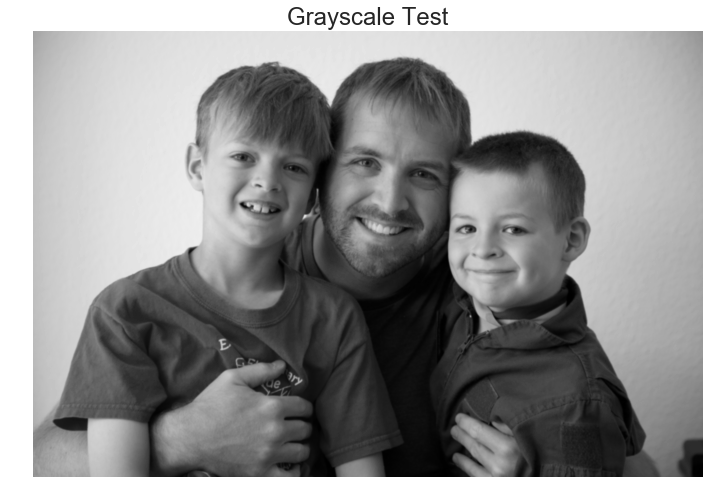

In [179]:
show_image(img=gray, title='Grayscale Test', cmap='gray')

## Create a Cascade Classifier
Use the Haar Cascade to initialize the Haar Cascade Classifier object.

In [174]:
face_cascade = cv2.CascadeClassifier(cascade_path)

## Try to detect the faces!
I found that this is highly dependent on the parameters. So you'll have to play around with the `scaleFactor` and the `minSize` until you end up with the right combination for your image.

In [175]:
faces = face_cascade.detectMultiScale(
    gray,
    scaleFactor=1.1,
    minNeighbors=5,
    minSize=(750, 750),
    flags = cv2.CASCADE_SCALE_IMAGE
)

print('{num_faces} faces found'.format(num_faces=len(faces)))

3 faces found


In [176]:
image = reverse_channels(image)

## Draw boxes around the faces
If the detector has found some faces, then let's plot some green boxes around them.

In [177]:
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 15)

## Did it work?

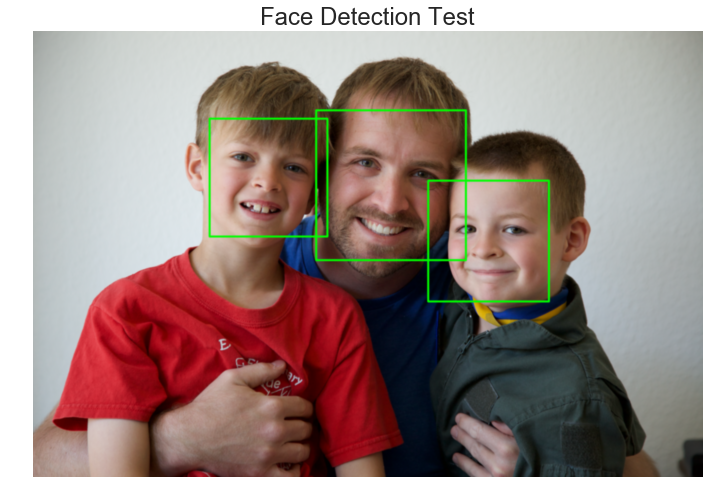

In [178]:
show_image(image, 'Face Detection Test')